In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load CSVs for data from 2008-2012
crime1317 = pd.read_csv("Source CSVs/Crime2013-2017.csv")
crime1317 = crime1317.loc[:, ~crime1317.columns.str.contains('^Unnamed')]

In [3]:
#Dropped colums in dataframe
crime_data1317 = crime1317.drop(columns =['Description', 'Longitude', 'Latitude', 'Day', 'Time', 'District',])
crime_data1317.head()

,Incident ID,Category,Year
0,180000417,ASSAULT,2017
1,180000069,ASSAULT,2017
2,180000069,BURGLARY,2017
3,180000069,WEAPON LAWS,2017
4,186005077,LARCENY/THEFT,2017


In [4]:
#Group by category
crimeyears1317_group = crime_data1317.groupby(['Year', 'Category'])
# Count how many times each year appears in our group
crime_data1317_count = crimeyears1317_group['Category'].count()
crime_data1317_count

Year  Category     
2013  ARSON              248
      ASSAULT          12580
      BAD CHECKS          26
      BRIBERY             69
      BURGLARY          6195
                       ...  
2017  TRESPASS          1613
      VANDALISM         9765
      VEHICLE THEFT     5732
      WARRANTS          5020
      WEAPON LAWS       1690
Name: Category, Length: 194, dtype: int64

In [5]:
crime_df1317 = pd.DataFrame(crime_data1317_count)
crime_df1317 = crime_df1317.rename(columns= {"Category": "Crime Count"})
crime_df1317 = crime_df1317.reset_index()
crime_df1317.head()

,Year,Category,Crime Count
0,2013,ARSON,248
1,2013,ASSAULT,12580
2,2013,BAD CHECKS,26
3,2013,BRIBERY,69
4,2013,BURGLARY,6195


In [6]:
# violent non violent and property

crimeCategories = []
data = {}
categories = list(crime_df1317["Category"])
crime_count = list(crime_df1317["Crime Count"])
year = list(crime_df1317["Year"])

for index in range(len(categories)):
    # violent crimes
    if(categories[index] == "ARSON" 
       or categories[index] == "RUNAWAY" 
       or categories[index] == "ASSAULT" 
       or categories[index] == "FAMILY OFFENSES"
       or categories[index] == "SEX OFFENSES, FORCIBLE" 
       or categories[index] == 'SUICIDE'
       or categories[index] == 'WEAPON LAWS'
       or categories[index] =="ROBBERY"):
        data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Violent Crime", "Year": year[index]  }
    #Nonviolent crimes
    elif(categories[index] == "BAD CHECKS" 
         or categories[index] == "RUNAWAY"
         or categories[index] =='BRIBERY'
         or categories[index] =='DISORDERLY CONDUCT'
         or categories[index] == 'DRIVING UNDER THE INFLUENCE'
         or categories[index] == 'DRUG/NARCOTIC'
         or categories[index] == 'DRUNKENNESS'
         or categories[index] =='EMBEZZLEMENT'
         or categories[index] =='EXTORTION'
         or categories[index] =='FORGERY/COUNTERFEITING'
         or categories[index] =='FRAUD'
         or categories[index] =='GAMBLING'
         or categories[index] =='KIDNAPPING'
         or categories[index] =='LIQUOR LAWS'
         or categories[index] =='LOITERING'
         or categories[index] =='MISSING PERSON'
         or categories[index] =='NON-CRIMINAL'
         or categories[index] =='OTHER OFFENSES'
         or categories[index] =='PORNOGRAPHY/OBSCENE MAT'
         or categories[index] =='PROSTITUTION'
         or categories[index] =='RECOVERED VEHICLE'
         or categories[index] =='SECONDARY CODES'
         or categories[index] =='SEX OFFENSES, NON FORCIBLE'
         or categories[index] =='SUSPICIOUS OCC'
         or categories[index] =='TRESPASS'
         or categories[index] =='VANDALISM'
         or categories[index] =='WARRANTS'):
         data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Non Violent Crime", "Year": year[index]  }
    #Property Theift
    elif(categories[index] =="BURGLARY" 
         or categories[index] =='LARCENY/THEFT'
         or categories[index] =='STOLEN PROPERTY'
         or categories[index] =='VEHICLE THEFT'):
         data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": "Property Theft", "Year": year[index]  }
    else:
        data = { "Category" : categories[index], "Crime Count" : crime_count[index], "Crime Category": None, "Year": year[index] }
        
    crimeCategories.append(data) 

crime_df = pd.DataFrame(crimeCategories)

In [7]:
crimeGroup_df = crime_df.groupby(['Crime Category', 'Year']).first()
crimeGroup_df.head()

Category  Crime Count
Crime Category    Year                         
Non Violent Crime 2013  BAD CHECKS           26
                  2014  BAD CHECKS           34
                  2015  BAD CHECKS           38
                  2016  BAD CHECKS           34
                  2017  BAD CHECKS           24

In [8]:
crimeGroup_df = crimeGroup_df.reset_index()
crimeGroup_df.head()

,Crime Category,Year,Category,Crime Count
0,Non Violent Crime,2013,BAD CHECKS,26
1,Non Violent Crime,2014,BAD CHECKS,34
2,Non Violent Crime,2015,BAD CHECKS,38
3,Non Violent Crime,2016,BAD CHECKS,34
4,Non Violent Crime,2017,BAD CHECKS,24


In [9]:
mungeCrime_df = crimeGroup_df.pivot(index ='Year', columns ='Crime Category', values=['Crime Count'])
mungeCrime_df

Crime Count                             
Crime Category Non Violent Crime Property Theft Violent Crime
Year                                                         
2013                          26           6195           248
2014                          34           6066           253
2015                          38           5931           311
2016                          34           5813           286
2017                          24           5857           327

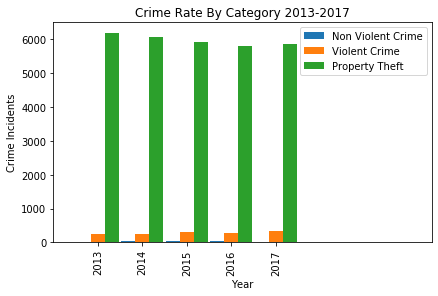

In [11]:
mungeCrime_df['Crime Count'][["Non Violent Crime", "Violent Crime", "Property Theft"]].plot(kind='bar', width=.95)

# Set textual properties
plt.legend(loc="best")

plt.tight_layout()
plt.xlim(-1, 7.5)
plt.title("Crime Rate By Category 2013-2017")
plt.xlabel("Year")
plt.ylabel("Crime Incidents")
plt.savefig("Images/CrimeCategory2013-2017.png")